In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")
%matplotlib inline
#设置图形的字体和线性颜色
plt.rcParams['font.sans-serif'] = ['SimHei']
r_hex = '#dc2624'
plt.rcParams['axes.unicode_minus'] = False

# 数据预处理

## 清洗

In [3]:
df_zz =pd.read_csv('df_zz_1106.csv')
df_liuyan = pd.read_csv('df_liuya_1106.csv')
df_comment = pd.read_csv('df_comment_1106.csv')

In [5]:
df_liuyan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21651 entries, 0 to 21650
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  21651 non-null  int64  
 1   _id         19747 non-null  object 
 2   uid         21651 non-null  int64  
 3   infoId      21651 non-null  int64  
 4   留言用户名字      21092 non-null  object 
 5   留言用户id      21651 non-null  int64  
 6   留言内容        21651 non-null  object 
 7   留言时间        21651 non-null  int64  
 8   回复名字        11416 non-null  object 
 9   回复id        11641 non-null  float64
 10  回复时间        11641 non-null  float64
 11  回复内容        11641 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [9]:
df_comment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2427451 entries, 0 to 2427450
Data columns (total 13 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   _id         object 
 2   uid         int64  
 3   infoId      int64  
 4   评论者         object 
 5   评论者身份       object 
 6   评分          int64  
 7   评论标签        object 
 8   评论内容        object 
 9   评论时间        int64  
 10  评论地点        object 
 11  卖家评价        object 
 12  卖家评价时间      float64
dtypes: float64(1), int64(5), object(7)
memory usage: 240.8+ MB


In [10]:
df_zz.drop_duplicates(subset=['infoId'],keep='first',inplace=True)
df_liuyan.drop_duplicates(subset=['infoId','留言用户id','留言时间'],keep='first',inplace=True)
df_comment.drop_duplicates(subset=['infoId','评论者','评论时间'],keep='first',inplace=True)

In [12]:
df_comment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 796129 entries, 0 to 2427450
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  796129 non-null  int64  
 1   _id         650207 non-null  object 
 2   uid         796129 non-null  int64  
 3   infoId      796129 non-null  int64  
 4   评论者         781096 non-null  object 
 5   评论者身份       796129 non-null  object 
 6   评分          796129 non-null  int64  
 7   评论标签        85889 non-null   object 
 8   评论内容        796129 non-null  object 
 9   评论时间        796129 non-null  int64  
 10  评论地点        515882 non-null  object 
 11  卖家评价        14913 non-null   object 
 12  卖家评价时间      14913 non-null   float64
dtypes: float64(1), int64(5), object(7)
memory usage: 85.0+ MB


In [23]:
data = df_zz
for i in['电脑','显卡','电动车','手机','苹果','晓龙','处理器','黄金','内存','三星','大侦探','典藏卡','小米','vivo','家具','钢琴','OPPO','华为','台式','游戏','纲手','一加','华硕','硬盘','不做了','手表','家用','新电池','和田玉','音质','原神','台式','热水器','回收','相机']:
    data = data[data.apply(lambda x:i not in x['title'],axis=1)]

In [44]:
data.describe()

,Unnamed: 0,infoId,price,uid,userStatus,商品原价,是否包邮,想要量,浏览量,留言数,...,恶意砍价,售假劣质品被举报次数,被举报成立次数,欺诈被举报次数,勋章,来自卖家,有图,好评,中评,差评
count,6548.000000,6.548000e+03,6548.000000,6.548000e+03,6548.000000,6532.000000,6532.0,6548.000000,6548.000000,6548.000000,...,6452.0,6452.000000,6452.0,6451.000000,6050.0,6548.000000,6548.000000,6548.000000,6548.000000,6548.00000
mean,6966.027031,1.715325e+18,52.233812,6.690461e+17,0.110263,424.171310,1.0,1.828955,16.304215,0.005651,...,0.0,0.010074,0.0,0.000775,0.0,5.911118,1.013286,54.022144,0.621717,0.82193
std,5979.189251,2.999129e+16,266.172983,7.446734e+17,0.313241,17512.411854,0.0,25.525234,625.191359,0.138061,...,0.0,0.101412,0.0,0.027832,0.0,40.739885,6.302902,107.907147,1.532599,2.20544
min,0.000000,8.113587e+17,0.000000,3.553618e+13,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1680.750000,1.717722e+18,19.000000,1.096337e+16,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.00000
50%,4750.500000,1.718348e+18,29.000000,1.896673e+17,0.000000,0.000000,1.0,0.000000,2.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,10.000000,0.000000,0.00000
75%,12508.500000,1.718930e+18,46.000000,1.599661e+18,0.000000,69.000000,1.0,0.000000,5.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,1.000000,1.000000,44.000000,1.000000,1.00000
max,18701.000000,1.719687e+18,16666.000000,1.719650e+18,1.000000,999999.000000,1.0,1151.000000,50454.000000,9.000000,...,0.0,2.000000,0.0,1.000000,0.0,999.000000,423.000000,661.000000,13.000000,33.00000


In [26]:
data.to_excel('data_clean1106.xlsx')

## 下载图片

In [3]:
import pandas as pd
data = pd.read_excel("D:/paper/secondhand/iv/result_clean.xlsx")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 57 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    6433 non-null   int64  
 1   polluted      9 non-null      float64
 2    authentic    9 non-null      float64
 3   Image         6433 non-null   object 
 4   HasUpperBody  6433 non-null   bool   
 5   _id           5485 non-null   object 
 6   infoId        6433 non-null   int64  
 7   metric        6433 non-null   object 
 8   title         6433 non-null   object 
 9   price         6433 non-null   int64  
 10  infoImage     6433 non-null   object 
 11  headImg       6433 non-null   object 
 12  nickName      6433 non-null   object 
 13  uid           6433 non-null   int64  
 14  adTicket      61 non-null     object 
 15  userStatus    6433 non-null   int64  
 16  labelText     6433 non-null   object 
 17  所有图片链接        6400 non-null   object 
 18  商品原价          6417 non-null 

In [5]:
from urllib.request import urlretrieve

# # 网络上图片的地址
# img_src = 'https://pic1.zhuanstatic.com/zhuanzh/63076e9f-1cea-4088-9241-070daf00f2e0.jpg'

# # 将远程数据下载到本地，第二个参数就是要保存到本地的文件名
# urlretrieve(img_src,'D:/paper/二手产品/picture/1.png')

In [32]:
for row in data[['infoId','infoImage']].itertuples(index=False):
    id,url = row
    urlretrieve(url,f'D:/paper/二手产品/picture/head_{id}.png')

In [3]:
for row in data[data.index>=3424][['infoId','所有图片链接']].itertuples(index=False):
    id,urls = row
    print(id)
    if "|" in str(urls):
        urls = urls.split('|')
        for i in range(len(urls)):
            urlretrieve(urls[i],f'D:/paper/二手产品/picture/{i}_{id}.png')

1718836884414469888
1718823344760179968
1718824780418550016
1718820211801400064
1718825928441829888
1718606135346860032
1718606829359930112
1718838692393769984
1718824434195160064
1718835896790640128
1718827483901760000
1718824733066510080
1718821125104519936
1718822098815140096
1718806630390400000
1718834054367389952
1718827196124339968
1718824307267830016
1718836164175320064
1718820969520349952
1718562715820839936
1718593950664019968
1718613420027760128
1718817294027869952
1718839689850670080
1718830443599749888
1718829555068280064
1718821696521609984
1718837717398279936
1718822107114949888
1718810041852709888
1718832610857179904
1718818053719640064
1718693862127960064
1718839258373479936
1718549480296580096
1718271946984100096
1718821677434129920
1718814218281309952
1718834066015930112
1718824286181220096
1718620908112199936
1718838846234469888
1718815976307840000
1718818569515190016
1526840241282400000
1718812112252640000
1718827262360519936
1718823667107940096
1718835939308379904


## 图像分析 clarifai API 先清洗数据

In [1]:
from clarifai_grpc.channel.clarifai_channel import ClarifaiChannel
from clarifai_grpc.grpc.api import resources_pb2, service_pb2, service_pb2_grpc
from clarifai_grpc.grpc.api.status import status_code_pb2

In [ ]:

##################################################################################################
# In this section, we set the user authentication, user and app ID, model details, and the URL
# of the image we want as an input. Change these strings to run your own example.
#################################################################################################

# Your PAT (Personal Access Token) can be found in the portal under Authentification
PAT = 'b63e70c1142b40409aece3b02406b3fc'
# Specify the correct user_id/app_id pairings
# Since you're making inferences outside your app's scope
USER_ID = 'hrainting'
APP_ID = 'main'
# Change these to whatever model and image URL you want to use
MODEL_ID = 'food-item-recognition'
MODEL_VERSION_ID = '1d5fd481e0cf4826aa72ec3ff049e044'
IMAGE_URL = 'https://samples.clarifai.com/metro-north.jpg'

############################################################################
# YOU DO NOT NEED TO CHANGE ANYTHING BELOW THIS LINE TO RUN THIS EXAMPLE
############################################################################



channel = ClarifaiChannel.get_grpc_channel()
stub = service_pb2_grpc.V2Stub(channel)

metadata = (('authorization', 'Key ' + PAT),)

userDataObject = resources_pb2.UserAppIDSet(user_id=USER_ID, app_id=APP_ID)

post_model_outputs_response = stub.PostModelOutputs(
    service_pb2.PostModelOutputsRequest(
        user_app_id=userDataObject,  # The userDataObject is created in the overview and is required when using a PAT
        model_id=MODEL_ID,
        version_id=MODEL_VERSION_ID,  # This is optional. Defaults to the latest model version
        inputs=[
            resources_pb2.Input(
                data=resources_pb2.Data(
                    image=resources_pb2.Image(
                        url=IMAGE_URL
                    )
                )
            )
        ]
    ),
    metadata=metadata
)
if post_model_outputs_response.status.code != status_code_pb2.SUCCESS:
    print(post_model_outputs_response.status)
    raise Exception("Post model outputs failed, status: " + post_model_outputs_response.status.description)

# Since we have one input, one output will exist here
output = post_model_outputs_response.outputs[0]

print("Predicted concepts:")
for concept in output.data.concepts:
    print("%s %.2f" % (concept.name, concept.value))

# Uncomment this line to print the full Response JSON
#print(output)


# cv2清洗数据

In [1]:
import os

In [2]:
path_photo = 'D:\paper\二手产品\headpicture' # 所有photo所在的文件夹目录
#
files_list = os.listdir(path_photo) # 得到文件夹下的所有文件名称，存在字符串列表中

### 生成image_resnet50_features

In [4]:
import pandas as pd
import numpy as np
import time
import gc
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

In [6]:
resnet = ResNet50()
intermediate_model = Model(inputs=resnet.input,
                           outputs=resnet.layers[-2].output)

image_folder = "D:\paper\二手产品\headpicture"
file_l = [i for i in os.listdir(image_folder) if i[-4:]==".png"]
img_l = []
for file in file_l:
    img = image.load_img(f"{image_folder}/{file}", target_size=(224, 224))
    img = image.img_to_array(img)
    img_l.append(img)
img_l = [preprocess_input(x) for x in img_l]
x_arr = np.stack(img_l)
preds_arr = intermediate_model.predict(x_arr, verbose=0)
res_dt = pd.DataFrame(preds_arr, columns = [f"featureResNet50_{i}" for i in range(preds_arr.shape[1])])
res_dt["sku_key"] = [i[:-4] for i in file_l]
res_dt = res_dt[["sku_key"]+[f"featureResNet50_{i}" for i in range(preds_arr.shape[1])]]

102967424/102967424 [==============================] - 19s 0us/step


ImportError: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.

In [7]:
res_dt

,sku_key,featureResNet50_0,featureResNet50_1,featureResNet50_2,featureResNet50_3,featureResNet50_4,featureResNet50_5,featureResNet50_6,featureResNet50_7,featureResNet50_8,...,featureResNet50_2038,featureResNet50_2039,featureResNet50_2040,featureResNet50_2041,featureResNet50_2042,featureResNet50_2043,featureResNet50_2044,featureResNet50_2045,featureResNet50_2046,featureResNet50_2047
0,head_1012174178542862346,0.420022,0.870905,0.016568,0.566109,0.176106,0.046738,0.000269,0.330081,0.114168,...,1.094419,0.313886,0.018884,0.100397,0.104682,0.321746,0.090264,0.023384,0.495674,0.097876
1,head_1069754080775389200,0.325530,3.163739,0.263346,1.067068,1.144615,0.089846,0.742594,1.755014,0.684139,...,0.000000,0.721698,0.151794,1.135919,0.006155,0.114006,0.083381,0.194050,0.442614,3.513230
2,head_1097742638033567747,1.363054,3.000543,0.950407,0.070472,0.958617,0.000000,0.369782,4.404724,0.001635,...,1.722150,0.814232,0.014491,0.081966,0.392121,0.000000,0.046088,0.030700,0.902650,3.874696
3,head_1309132874270959312,0.720076,0.708608,0.203013,0.022486,3.536333,0.233563,0.203528,0.324958,5.168813,...,0.005681,0.191354,1.059663,0.474383,0.107552,0.839216,0.090938,0.002466,0.331910,0.138341
4,head_1382365966036960256,0.153551,2.270304,0.000000,0.000000,0.322040,0.375105,0.092387,0.000000,0.048603,...,1.006289,0.091365,0.000000,0.000000,0.117812,0.867149,0.046039,0.265339,1.471083,0.274653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6543,head_1719686334212133376,0.038806,4.911072,1.221609,0.000000,0.227566,0.062860,0.190482,0.306964,0.003261,...,0.091791,0.000000,0.011773,0.000000,0.157251,0.554050,0.194177,0.226269,0.080892,0.682579
6544,head_1719686700364911104,0.885669,0.988088,0.000000,0.166708,2.132010,0.131538,0.355934,2.221939,0.037771,...,0.040420,0.031588,0.408028,1.931747,0.516376,0.493323,0.183661,0.062651,0.176293,2.953348
6545,head_1719687442434183680,0.367826,0.804443,0.000000,2.239426,0.253165,0.438962,0.757302,1.534401,0.047888,...,0.110566,0.223090,0.018783,0.000000,0.268281,0.000000,0.050830,1.477176,0.042210,1.302407
6546,head_811358685860659202,0.799816,2.649730,0.249945,0.000656,0.052568,0.270316,0.372865,0.694616,0.130266,...,1.066735,0.042143,0.000000,0.994129,0.088379,0.000000,0.142908,1.171257,1.139945,3.025183


In [8]:
res_dt.to_parquet("D:/paper/二手产品/dlresnet50_features.parquet")

### generate_image_mask_and_random_splits

### produces RGB color-clusters over using KMeans method.

In [3]:
import numpy as np
import cv2 as cv2
import os
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [4]:
import plotly.io as pio
pio.renderers.default = "notebook_connected"

###### PARAMETERS ######
num_clusters = 30 # number of color clusters to use
########################



base_pic_folder = "D:/paper/secondhand/headpicture"#opencv 不能出现中文名
file_l = [i for i in os.listdir(base_pic_folder) if i[-4:]==".png"]
arr_d = {}
arr_d["pixel_vals"] = []
arr_d["sku_key"] = {"pixel_vals":[]}
for file in tqdm(file_l):
    img = cv2.imread(f"{base_pic_folder}/{file}")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    non_back_arr = (gray_img<=250)    
    img_arr = img_rgb[non_back_arr]
    dt = pd.DataFrame(img_arr,columns=["r","g","b"])
    dt["weight"] = 1
    temp_dt = dt.groupby(["r","g","b"], as_index=False).sum()
    arr_d["pixel_vals"].append(temp_dt.values)
    arr_d["sku_key"]["pixel_vals"].extend([file[:-4]]*temp_dt.shape[0])        

for d in arr_d:    
    if d!="sku_key":
        arr_d[d] = np.vstack(arr_d[d])


os.makedirs("./RESULTS/models/", exist_ok = True)
temp_dt = pd.DataFrame(arr_d["pixel_vals"],columns=["r","g","b","weight"])
temp_dt = temp_dt.groupby(["r","g","b"], as_index=False).sum()
mod = MiniBatchKMeans(num_clusters, batch_size=1000000, verbose=0, random_state=0)

mod.fit(temp_dt[["r","g","b"]].values,sample_weight=temp_dt["weight"].values)
c_centers_arr = mod.cluster_centers_
np.save("./RESULTS/models/color_clusters",mod)

color_dt = pd.DataFrame(arr_d["pixel_vals"],columns=["r","g","b","weight"])
color_dt["sku_key"] = arr_d["sku_key"]["pixel_vals"]
color_dt["segment"] = mod.predict(color_dt[["r","g","b"]])

color_dt = color_dt.groupby(["sku_key","segment"], as_index=False)["weight"].sum()
temp_dt = color_dt.groupby(["sku_key"],as_index=False)["weight"].sum()
color_dt = color_dt.merge(temp_dt,on="sku_key",how="left")
color_dt["share"] = color_dt["weight_x"]/color_dt["weight_y"]
del color_dt["weight_x"]
del color_dt["weight_y"]
fin_dt = color_dt[["sku_key"]].drop_duplicates()
for i in range(c_centers_arr.shape[0]):
    temp_dt = color_dt[color_dt["segment"]==i]
    del temp_dt["segment"]
    fin_dt = fin_dt.merge(temp_dt,on="sku_key",how="left").fillna(0).rename(columns={"share":"cluster_share_rgb_"+str(i)})
fin_dt.to_parquet("./_data/color_clusters_rgb.parquet")

h = 5
w = int(c_centers_arr.shape[0]/h)
f, axarr = plt.subplots(h,w,figsize=(7,7)) 

for i in range(c_centers_arr.shape[0]):
    im = (np.ones((10,10,3))*c_centers_arr[i]).astype(np.uint8)
    axarr[i%h][i//h].imshow(im)
    axarr[i%h][i//h].set_title("Cluster "+str(i))
    axarr[i%h][i//h].axis('off')
f.tight_layout(pad= 0.4)
os.makedirs("./RESULTS/final_figures/", exist_ok = True)
f.savefig("./RESULTS/final_figures/Cluster_centers_rgb.png")

  0%|          | 0/6548 [00:00<?, ?it/s]

MemoryError: Unable to allocate 3.07 GiB for an array with shape (411757518,) and data type uint64

In [ ]:
###### PARAMETERS ######
num_clusters = 30 # number of color clusters to use
########################



base_pic_folder = "D:/paper/secondhand/headpicture"#opencv 不能出现中文名
file_l = [i for i in os.listdir(base_pic_folder) if i[-4:]==".png"]
arr_d = {}
arr_d["pixel_vals"] = []
arr_d["sku_key"] = {"pixel_vals":[]}
for file in tqdm(file_l):
    img = cv2.imread(f"{base_pic_folder}/{file}")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    non_back_arr = (gray_img<=250)    
    img_arr = img_rgb[non_back_arr]
    dt = pd.DataFrame(img_arr,columns=["r","g","b"])
    dt["weight"] = 1
    temp_dt = dt.groupby(["r","g","b"], as_index=False).sum()
    arr_d["pixel_vals"].append(temp_dt.values)
    arr_d["sku_key"]["pixel_vals"].extend([file[:-4]]*temp_dt.shape[0])        

for d in arr_d:    
    if d!="sku_key":
        arr_d[d] = np.vstack(arr_d[d])


os.makedirs("./RESULTS/models/", exist_ok = True)
temp_dt = pd.DataFrame(arr_d["pixel_vals"],columns=["r","g","b","weight"])
temp_dt = temp_dt.groupby(["r","g","b"], as_index=False).sum()
mod = MiniBatchKMeans(num_clusters, batch_size=1000000, verbose=0, random_state=0)

mod.fit(temp_dt[["r","g","b"]].values,sample_weight=temp_dt["weight"].values)
c_centers_arr = mod.cluster_centers_
np.save("./RESULTS/models/color_clusters",mod)

color_dt = pd.DataFrame(arr_d["pixel_vals"],columns=["r","g","b","weight"])
color_dt["sku_key"] = arr_d["sku_key"]["pixel_vals"]
color_dt["segment"] = mod.predict(color_dt[["r","g","b"]])

color_dt = color_dt.groupby(["sku_key","segment"], as_index=False)["weight"].sum()
temp_dt = color_dt.groupby(["sku_key"],as_index=False)["weight"].sum()
color_dt = color_dt.merge(temp_dt,on="sku_key",how="left")
color_dt["share"] = color_dt["weight_x"]/color_dt["weight_y"]
del color_dt["weight_x"]
del color_dt["weight_y"]
fin_dt = color_dt[["sku_key"]].drop_duplicates()
for i in range(c_centers_arr.shape[0]):
    temp_dt = color_dt[color_dt["segment"]==i]
    del temp_dt["segment"]
    fin_dt = fin_dt.merge(temp_dt,on="sku_key",how="left").fillna(0).rename(columns={"share":"cluster_share_rgb_"+str(i)})
fin_dt.to_parquet("./_data/color_clusters_rgb.parquet")

h = 5
w = int(c_centers_arr.shape[0]/h)
f, axarr = plt.subplots(h,w,figsize=(7,7)) 

for i in range(c_centers_arr.shape[0]):
    im = (np.ones((10,10,3))*c_centers_arr[i]).astype(np.uint8)
    axarr[i%h][i//h].imshow(im)
    axarr[i%h][i//h].set_title("Cluster "+str(i))
    axarr[i%h][i//h].axis('off')
f.tight_layout(pad= 0.4)
os.makedirs("./RESULTS/final_figures/", exist_ok = True)
f.savefig("./RESULTS/final_figures/Cluster_centers_rgb.png")

# 人检测

In [2]:
import cv2
import os
import pandas as pd

# 加载上半身检测器
upperbody_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_upperbody.xml')

# 文件夹路径
folder_path = r'D:\paper\secondhand\headpicture'

# 创建一个 DataFrame 用于存储结果
result_df = pd.DataFrame(columns=['Image', 'HasUpperBody'])

# 遍历文件夹中的所有图像文件
for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
        # 构建图像文件的完整路径
        image_path = os.path.join(folder_path, filename)

        # 读取图像
        img = cv2.imread(image_path)

        if img is not None:
            # 转换为灰度图像
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # 使用上半身检测器检测上半身
            upper_bodies = upperbody_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

            # 判断是否检测到上半身
            has_upper_body = len(upper_bodies) > 0

            # 将结果添加到 DataFrame
            result_df = result_df._append({'Image': filename, 'HasUpperBody': has_upper_body}, ignore_index=True)

# 将结果保存到 CSV 文件
result_df.to_csv('upperbody_detection_results2.csv', index=False)

print("识别结果已保存到 upperbody_detection_results2.csv 文件.")


识别结果已保存到 upperbody_detection_results2.csv 文件.


## YOLO

In [4]:
import cv2
import numpy as np
import csv
import os


# 设置 YOLO 相关文件的路径
yolo_config_path = "C:/Users/lenovo/darknet/cfg/yolov4.cfg"
yolo_weights_path = "C:/Users/lenovo/darknet/cfg/yolov4.weights"
yolo_names_path = "C:/Users/lenovo/darknet/data/coco.names"

# 读取 YOLO 模型
net = cv2.dnn.readNet(yolo_weights_path, yolo_config_path)

# 加载 COCO 数据集类别名称
with open(yolo_names_path, 'r') as f:
    classes = f.read().strip().split('\n')

# 图像文件夹路径
image_folder = r"D:\paper\secondhand\headpicture"

# 结果保存的 CSV 文件
output_csv_path = "detection_results.csv"

# 创建 CSV 文件并写入列名
with open(output_csv_path, mode='w', newline='') as csvfile:
    fieldnames = ['Image_Name', 'Person_Detected']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    writer.writeheader()

    # 加载图像
    image_names = [file for file in os.listdir(image_folder) if file.endswith(('.jpg', '.jpeg', '.png'))]
    for image_name in image_names:
        image_path = os.path.join(image_folder, image_name)
        image = cv2.imread(image_path)
        height, width, _ = image.shape

        # 构建 YOLO 输入 blob
        blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
        net.setInput(blob)

        # 获取 YOLO 输出层信息
        output_layers_names = net.getUnconnectedOutLayersNames()
        layer_outputs = net.forward(output_layers_names)

        # 处理 YOLO 输出
        boxes = []
        confidences = []
        class_ids = []

        for output in layer_outputs:
            for detection in output:
                scores = detection[5:]
                class_id = np.argmax(scores)
                confidence = scores[class_id]

                if confidence > 0.5 and class_id == 0:  # 类别编号 0 代表人
                    center_x, center_y, w, h = (detection[0:4] * np.array([width, height, width, height])).astype(int)
                    x, y = int(center_x - w / 2), int(center_y - h / 2)
                    boxes.append([x, y, w, h])
                    confidences.append(float(confidence))
                    class_ids.append(class_id)

        # 非极大值抑制
        indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

        # 写入 CSV 文件
        if len(indices) > 0:
            writer.writerow({'Image_Name': image_name, 'Person_Detected': 'Yes'})
        else:
            writer.writerow({'Image_Name': image_name, 'Person_Detected': 'No'})

print(f"检测结果已保存到 {output_csv_path}")


检测结果已保存到 detection_results.csv


# VGG16

In [9]:
import pandas as pd
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.layers import Dropout
from sklearn.model_selection import train_test_split
import numpy as np

# 加载DataFrame
excel_path = "C:\\Users\\lenovo\\Documents\\WPSDrive\\1524623893\\WPS企业云盘\\中南财经政法大学\\我的企业文档\\二手产品\\进度\\result_clean.xlsx"
data = pd.read_excel(excel_path)
df = data.head(100)
# 图像文件夹路径
image_dir = "D:\\paper\\secondhand\\headpicture"

# 使用ImageDataGenerator进行数据增强
datagen = image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# 使用ImageDataGenerator从DataFrame中读取图像
generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=image_dir,
    x_col="Image",  # 图像名称列
    y_col=" authentic",  # 标签列
    target_size=(225, 300),
    batch_size=32,
    class_mode='raw',  # 回归任务使用 'raw'
    shuffle=True
)


Found 100 validated image filenames.


In [10]:
# 加载VGG16模型，不包括顶层（全连接层）
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(225, 300, 3))

# 获取VGG16模型的输出
vgg_output = base_model.output

# 添加自定义全连接层
flatten_layer = Flatten()(vgg_output)
dense_layer1 = Dense(256, activation='relu')(flatten_layer)
dropout_layer = Dropout(0.5)(dense_layer1)
output_layer = Dense(1, activation='linear')(dropout_layer)

# 构建自定义模型
model = Model(inputs=base_model.input, outputs=output_layer)

# 冻结 VGG16 的卷积层
base_model.trainable = False

# 编译模型
model.compile(loss='mean_squared_error', optimizer=Adam(), metrics=['mean_absolute_error'])

# 训练模型
model.fit(generator, epochs=10)

Epoch 1/10
4/4 [==============================] - 58s 17s/step - loss: 90.0390 - mean_absolute_error: 8.2035
Epoch 2/10
4/4 [==============================] - 58s 13s/step - loss: 22.9777 - mean_absolute_error: 4.0645
Epoch 3/10
4/4 [==============================] - 56s 12s/step - loss: 16.2867 - mean_absolute_error: 3.3579
Epoch 4/10
4/4 [==============================] - 55s 12s/step - loss: 7.5548 - mean_absolute_error: 2.1245
Epoch 5/10
4/4 [==============================] - 54s 12s/step - loss: 6.2239 - mean_absolute_error: 2.0036
Epoch 6/10
4/4 [==============================] - 51s 11s/step - loss: 4.3465 - mean_absolute_error: 1.5534
Epoch 7/10
4/4 [==============================] - 49s 16s/step - loss: 3.4507 - mean_absolute_error: 1.4557
Epoch 8/10
4/4 [==============================] - 51s 11s/step - loss: 2.9999 - mean_absolute_error: 1.3815
Epoch 9/10
4/4 [==============================] - 49s 15s/step - loss: 2.4482 - mean_absolute_error: 1.2306
Epoch 10/10
4/4 [========

In [11]:
# 使用训练好的模型进行预测
predictions = model.predict(generator)

# 将预测结果添加到DataFrame中
df['predicted_authentic'] = predictions

# 打印预测结果
print(df[['Image', ' authentic', 'predicted_authentic']])

# 为其他数据打标签
# 假设有一个新的DataFrame称为 new_data，包含待打标签的图像名称列为 "Image"
new_data =  data

# 使用ImageDataGenerator进行数据增强并从新的DataFrame中读取图像
new_generator = datagen.flow_from_dataframe(
    dataframe=new_data,
    directory=image_dir,
    x_col="Image",
    target_size=(225, 300),
    batch_size=32,
    class_mode=None,  # 设置为 None，因为这里我们不需要标签
    shuffle=False  # 保持顺序
)

# 使用模型进行预测
new_predictions = model.predict(new_generator)

# 将预测结果添加到新的DataFrame中
new_data['predicted_authentic'] = new_predictions.flatten()

# 打印为其他数据打标签的结果
print(new_data[['Image', 'predicted_authentic']])

new_data.to_excel('D:\paper\secondhand\iv\VGG162.xlsx')
df.to_excel('D:\paper\secondhand\iv\predictions2.xlsx')

4/4 [==============================] - 27s 6s/step
                           Image   authentic  predicted_authentic
0   head_1012174178542862346.png         5.0             4.141305
1   head_1069754080775389200.png         4.0             3.650904
2   head_1097742638033567747.png         4.0             4.496332
3   head_1414034614477571072.png         4.0             3.629560
4   head_1414035389098410496.png         4.0             3.564136
..                           ...         ...                  ...
95  head_1716698469307093504.png         4.0             4.391719
96  head_1716700310795292672.png         4.0             3.405168
97  head_1716701680162280448.png         3.0             1.918617
98  head_1716714810643878912.png         4.0             3.933315
99  head_1716721666390642688.png         4.0             3.282511

[100 rows x 3 columns]


C:\Users\lenovo\AppData\Local\Temp/ipykernel_12652/2237088283.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['predicted_authentic'] = predictions


Found 6424 validated image filenames.
201/201 [==============================] - 1631s 8s/step
                             Image  predicted_authentic
0     head_1012174178542862346.png             4.501143
1     head_1069754080775389200.png             3.424792
2     head_1097742638033567747.png             3.508769
3     head_1414034614477571072.png             3.512487
4     head_1414035389098410496.png             3.490082
...                            ...                  ...
6419  head_1719686334212133376.png             3.270895
6420  head_1719686700364911104.png             3.283749
6421  head_1719687442434183680.png             3.239830
6422   head_811358685860659202.png             3.910758
6423   head_860434193035919366.png             3.561357

[6424 rows x 2 columns]


# T检验

In [12]:
import pandas as pd
from scipy.stats import ttest_ind

# 读取数据
file_path = r"D:\paper\secondhand\iv\VGG16.xlsx"
df = pd.read_excel(file_path)

# 分组字段
grouped_field = "Person_Detected"

# 需要比较的数据字段
columns_to_compare = ["predicted_polluted", "predicted_authentic", "想要量", "浏览量", "总评分"]

# 拆分数据为两组
grouped_data = df.groupby(grouped_field)
group1 = grouped_data.get_group("Yes")[columns_to_compare]
group2 = grouped_data.get_group("No")[columns_to_compare]

# 执行t检验
t_statistic, p_value = ttest_ind(group1, group2)

# 显示结果
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# 判断差异是否显著
if p_value < 0.05:
    print("差异显著")
else:
    print("差异不显著")

T-Statistic: [ 4.68596989  4.43685466  1.60139617  1.61597329 -6.80565466]
P-Value: [2.84381456e-06 9.28069239e-06 1.09338384e-01 1.06149209e-01
 1.09698203e-11]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

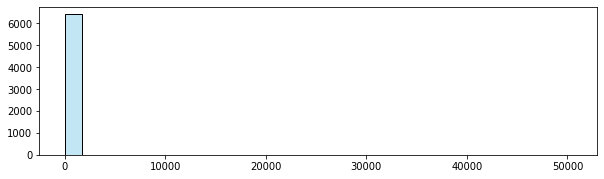

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# 假设 df 是包含浏览量和想要量的 DataFrame，列名分别为 '浏览量' 和 '想要量'
# Replace '浏览量' and '想要量' with your actual column names

# 设置图形大小
plt.figure(figsize=(10, 6))

# 创建浏览量的分布图
plt.subplot(2, 1, 1)
sns.histplot(df['浏览量'].values, bins=30, kde=True, color='skyblue')
plt.title('浏览量分布图')

# 创建想要量的分布图
plt.subplot(2, 1, 2)
sns.histplot(df['想要量'].values, bins=30, kde=True, color='salmon')
plt.title('想要量分布图')

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()


# 回归分析

In [13]:
import pandas as pd
import statsmodels.api as sm

# 读取数据
file_path = r"D:\paper\secondhand\iv\VGG16.xlsx"
df = pd.read_excel(file_path)

# 选择自变量和因变量
independent_vars = ["predicted_polluted", "predicted_authentic"]
dependent_vars = ["想要量", "浏览量", "总评分"]

# 循环进行回归分析
for dependent_var in dependent_vars:
    X = df[independent_vars]
    y = df[dependent_var]

    # 添加常数项
    X = sm.add_constant(X)

    # 拟合回归模型
    model = sm.OLS(y, X).fit()

    # 打印回归结果
    print(f"Dependent Variable: {dependent_var}")
    print(model.summary())
    print("\n" + "="*40 + "\n")

Dependent Variable: 想要量
                            OLS Regression Results                            
Dep. Variable:                    想要量   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6821
Date:                Sat, 20 Jan 2024   Prob (F-statistic):              0.506
Time:                        13:01:28   Log-Likelihood:                -14618.
No. Observations:                6424   AIC:                         2.924e+04
Df Residuals:                    6421   BIC:                         2.926e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const     

In [14]:
import pandas as pd
import statsmodels.api as sm

# 读取数据
file_path = r"D:\paper\secondhand\iv\VGG16.xlsx"
df = pd.read_excel(file_path)

# 定义变量
independent_vars = ["predicted_polluted", "predicted_authentic"]
dependent_vars = ["想要量", "浏览量", "总评分"]

# 执行Tobit回归分析
for dependent_var in dependent_vars:
    X = sm.add_constant(df[independent_vars])
    y = df[dependent_var]

    # 拟合Tobit回归模型
    tobit_model = sm.OLS(y, X, missing='drop')
    tobit_results = tobit_model.fit(censor_left=True)  # 设置censor_left=False进行右截断

    # 显示Tobit回归结果
    print(f"Tobit Regression for Dependent Variable: {dependent_var}")
    print(tobit_results.summary())
    print("\n" + "="*40 + "\n")

Tobit Regression for Dependent Variable: 想要量
                            OLS Regression Results                            
Dep. Variable:                    想要量   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6821
Date:                Sat, 20 Jan 2024   Prob (F-statistic):              0.506
Time:                        13:23:29   Log-Likelihood:                -14618.
No. Observations:                6424   AIC:                         2.924e+04
Df Residuals:                    6421   BIC:                         2.926e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [15]:
import pandas as pd
import statsmodels.api as sm

# 读取数据
file_path = r"D:\paper\secondhand\iv\VGG16.xlsx"
df = pd.read_excel(file_path)

# 定义自变量
independent_vars = ["predicted_polluted", "predicted_authentic"]

# 定义因变量列表
dependent_vars = ["浏览量", "想要量", "总评分"]

# 拟合泊松回归模型并显示结果
for dependent_var in dependent_vars:
    # 添加截距项
    X = sm.add_constant(df[independent_vars])
    
    # 拟合泊松回归模型
    poisson_model = sm.GLM(df[dependent_var], X, family=sm.families.Poisson()).fit()

    # 显示泊松回归结果
    print(f"Poisson Regression for Dependent Variable: {dependent_var}")
    print(poisson_model.summary())
    print("\n" + "="*40 + "\n")


Poisson Regression for Dependent Variable: 浏览量
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    浏览量   No. Observations:                 6424
Model:                            GLM   Df Residuals:                     6421
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -4.1793e+05
Date:                Sat, 20 Jan 2024   Deviance:                   8.1709e+05
Time:                        14:43:05   Pearson chi2:                 7.73e+07
No. Iterations:                    10   Pseudo R-squ. (CS):             0.9998
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------

In [16]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'polluted', ' authentic', 'Image',
       'Person_Detected', 'HasUpperBody', '_id', 'infoId', 'metric', 'title',
       'price', 'infoImage', 'headImg', 'nickName', 'uid', 'adTicket',
       'userStatus', 'labelText', '所有图片链接', '商品原价', '是否包邮', '商品标签', '商品说明',
       '发布地', '想要量', '浏览量', '留言数', '总评分', '评论数', '交易次数', '好评率', '处罚记录',
       '关联账号信息', '实人认证', '微信支付分', '近期卖出', '发货后被退货', '近期买入', '申请退款次数', '交易纠纷数',
       '恶意退货退款', '恶意砍价', '不诚信交易', '骚扰辱骂', '售假劣质品被举报次数', '被举报成立次数', '欺诈被举报次数',
       '粉丝', '关注', '勋章', '卖家简介', '全部', '来自买家', '来自卖家', '有图', '好评', '中评', '差评',
       'predicted_polluted', 'predicted_authentic'],
      dtype='object')

In [17]:
df[df['Image'] == 'head_1718129828196389888.png'].index

Index([2501], dtype='int64')

In [71]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# 假设 df 是包含浏览量、想要量和其他变量的 DataFrame，列名分别为 '浏览量'、'想要量' 和其他变量
# Replace column names accordingly

# 对因变量进行对数化
df['log_浏览量'] = np.log1p(df['浏览量'])
df['log_想要量'] = np.log1p(df['想要量'])
# # 设置图形大小
# plt.figure(figsize=(10, 6))

# # 创建浏览量的分布图
# plt.subplot(2, 1, 1)
# sns.histplot(df['log_浏览量'], bins=30, kde=True, color='skyblue')
# plt.title('log(1 + 浏览量) 分布图')

# # 创建想要量的分布图
# plt.subplot(2, 1, 2)
# sns.histplot(df['想要量'], bins=30, kde=True, color='salmon')
# plt.title('想要量分布图')

# # 调整布局
# plt.tight_layout()

# # 显示图形
# plt.show()

# 构建广义线性模型
X = df[['predicted_polluted', 'predicted_authentic']]  # 选择你的解释变量
X = sm.add_constant(X)  # 添加常数列
y = df['log_浏览量']

# 使用负二项分布和对数链接函数进行广义线性回归
glm_model = sm.GLM(y, X, family=sm.families.NegativeBinomial())
glm_results = glm_model.fit()

# 输出回归结果
print(glm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                log_浏览量   No. Observations:                 6424
Model:                            GLM   Df Residuals:                     6421
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10461.
Date:                Sat, 20 Jan 2024   Deviance:                       1018.5
Time:                        18:36:17   Pearson chi2:                 1.22e+03
No. Iterations:                     5   Pseudo R-squ. (CS):          3.623e-05
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2608    

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.


In [72]:
# 构建广义线性模型
X = df[['predicted_polluted', 'predicted_authentic']]  # 选择你的解释变量
X = sm.add_constant(X)  # 添加常数列
y = df['log_想要量']

# 使用负二项分布和对数链接函数进行广义线性回归
glm_model = sm.GLM(y, X, family=sm.families.NegativeBinomial())
glm_results = glm_model.fit()

# 输出回归结果
print(glm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                log_想要量   No. Observations:                 6424
Model:                            GLM   Df Residuals:                     6421
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -745.25
Date:                Sat, 20 Jan 2024   Deviance:                       1017.7
Time:                        18:36:42   Pearson chi2:                 6.43e+03
No. Iterations:                     6   Pseudo R-squ. (CS):          0.0001139
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.0973    

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.


In [74]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 假设 df 是包含浏览量、想要量和其他变量的 DataFrame，列名分别为 '浏览量'、'想要量' 和其他变量
# Replace column names accordingly



# 构建零膨胀负二项回归模型
X = df[['predicted_polluted', 'predicted_authentic']]  # 选择你的解释变量
X = sm.add_constant(X)  # 添加常数列
y = df['浏览量']  # 这里使用原始浏览量作为因变量

# 使用零膨胀负二项回归模型
zinb_model = sm.ZeroInflatedNegativeBinomialP(y, X)
zinb_results = zinb_model.fit()

# 输出回归结果
print(zinb_results.summary())


invalid value encountered in log
Inverting hessian failed, no bse or cov_params available


Optimization terminated successfully.
         Current function value: 3.205450
         Iterations: 25
         Function evaluations: 28
         Gradient evaluations: 28


invalid value encountered in log
invalid value encountered in log


                     ZeroInflatedNegativeBinomialP Regression Results                    
Dep. Variable:                               浏览量   No. Observations:                 6424
Model:             ZeroInflatedNegativeBinomialP   Df Residuals:                     6421
Method:                                      MLE   Df Model:                            2
Date:                           Sat, 20 Jan 2024   Pseudo R-squ.:                 0.02559
Time:                                   18:38:14   Log-Likelihood:                -20592.
converged:                                  True   LL-Null:                       -21133.
Covariance Type:                       nonrobust   LLR p-value:                1.377e-235
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
inflate_const         -24.0608   1539.894     -0.016      0.988   -3042.198    2994.076
const           

Inverting hessian failed, no bse or cov_params available
Inverting hessian failed, no bse or cov_params available


In [77]:
# 构建零膨胀负二项回归模型
X = df[['predicted_polluted', 'predicted_authentic']]  # 选择你的解释变量
X = sm.add_constant(X)  # 添加常数列
y = df['log_浏览量']  # 这里使用原始浏览量作为因变量

# 使用零膨胀负二项回归模型
zinb_model = sm.ZeroInflatedNegativeBinomialP(y, X)
zinb_results = zinb_model.fit()

# 输出回归结果
print(zinb_results.summary())

invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
overflow encountered in exp
overflow encountered in exp
invalid value encountered in multiply
divide by zero encountered in log
invalid value encountered in multiply
invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
Desired error not necessarily achieved due to precision loss.
Inverting hessian failed, no bse or cov_params available
Maximum Likelihood optimization failed to converge. Check mle_retvals


         Current function value: nan
         Iterations: 1
         Function evaluations: 112
         Gradient evaluations: 112


invalid value encountered in log
invalid value encountered in log
Inverting hessian failed, no bse or cov_params available
invalid value encountered in log
invalid value encountered in log
Inverting hessian failed, no bse or cov_params available
invalid value encountered in log
overflow encountered in exp
invalid value encountered in multiply
divide by zero encountered in log
invalid value encountered in multiply
overflow encountered in exp
invalid value encountered in log
invalid value encountered in log


                     ZeroInflatedNegativeBinomialP Regression Results                    
Dep. Variable:                           log_浏览量   No. Observations:                 6424
Model:             ZeroInflatedNegativeBinomialP   Df Residuals:                     6421
Method:                                      MLE   Df Model:                            2
Date:                           Sat, 20 Jan 2024   Pseudo R-squ.:                     nan
Time:                                   18:43:46   Log-Likelihood:                    nan
converged:                                 False   LL-Null:                           nan
Covariance Type:                       nonrobust   LLR p-value:                       nan
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
inflate_const        -510.7245        nan        nan        nan         nan         nan
const           

invalid value encountered in log
invalid value encountered in log
Inverting hessian failed, no bse or cov_params available


# shap

In [51]:
import shap
import xgboost
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


In [60]:
# 读取颜色特征数据
color_file_path = r"D:\paper\secondhand\color.csv"

df_color = pd.read_csv(color_file_path).dropna()

# 读取主数据
main_data_file_path = r"D:\paper\secondhand\iv\VGG16.xlsx"
df_main = pd.read_excel(main_data_file_path)


# 读取合并后的数据
merged_df = pd.merge(df_main, df_color, left_on='Image', right_on='image', how='inner')
merged_df['predicted_polluted'] = merged_df['predicted_polluted'].apply(pd.to_numeric, errors='coerce', downcast='float')

# 选择颜色特征作为自变量
features = merged_df[['RGB_R_mean', 'RGB_R_median', 'RGB_R_std_dev', 'RGB_R_min', 'RGB_R_max', 'RGB_G_mean', 'RGB_G_median', 'RGB_G_std_dev', 'RGB_G_min', 'RGB_G_max', 'RGB_B_mean', 'RGB_B_median', 'RGB_B_std_dev', 'RGB_B_min', 'RGB_B_max', 'HSV_H_mean', 'HSV_H_std_dev', 'HSV_S_mean', 'HSV_S_std_dev', 'HSV_V_mean', 'HSV_V_std_dev', 'XYZ_X_mean', 'XYZ_X_std_dev', 'XYZ_Y_mean', 'XYZ_Y_std_dev', 'XYZ_Z_mean', 'XYZ_Z_std_dev', 'Lab_L_mean', 'Lab_L_std_dev', 'Lab_a_mean', 'Lab_a_std_dev', 'Lab_b_mean', 'Lab_b_std_dev', 'gray_mean', 'gray_std_dev', 'contrast_range', 'contrast_range_lower', 'contrast_range_upper', 'contrast_n_peak', 'contrast_peak_distance', 'colorful', 'colorful_emd', 'black', 'blue', 'brown', 'gray', 'green', 'orange', 'pink', 'purple', 'red', 'white', 'yellow', 'color_shannon', 'color_simpson', 'hue_count']]
merged_df[features.columns] = merged_df[features.columns].apply(pd.to_numeric, errors='coerce', downcast='float')

# 设置阈值将问题转换为二进制分类任务
threshold = merged_df['predicted_polluted'].mean()  # Set your threshold based on your problem
print(f'threshold={threshold}')
df_color[features.columns] = df_color[features.columns].apply(pd.to_numeric, errors='coerce', downcast='float')

Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74) have mixed types. Specify dtype option on import or set low_memory=False.


threshold=4.135162089977861


In [62]:

# Convert continuous labels to binary classes
labels_binary = (merged_df['predicted_polluted'] > threshold).astype(float)

# 初始化XGBoost分类器
classifier = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(merged_df[features.columns], label=labels_binary), 100)



[16:48:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


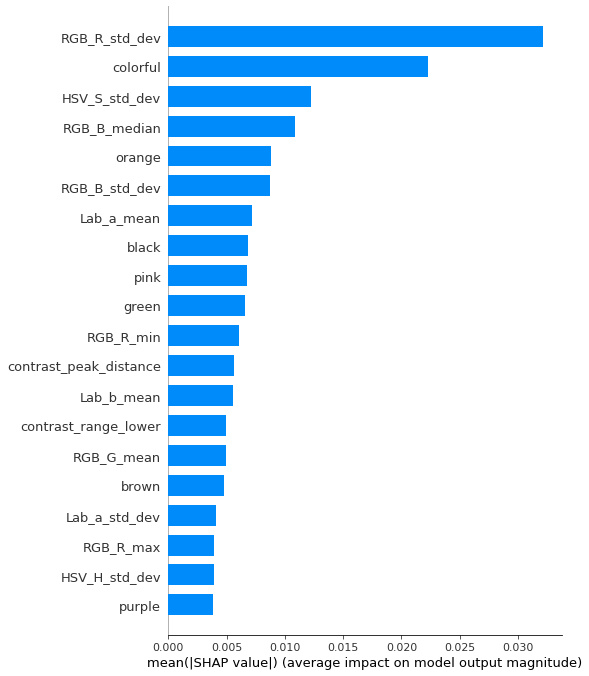

In [65]:
# 解释模型预测
explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(merged_df[features.columns])

# 绘制汇总图
shap.summary_plot(shap_values, merged_df[features.columns], plot_type="bar", feature_names=features.columns)

In [66]:
shap_values

array([[-1.1054928e-03,  4.6505826e-04,  2.6006741e-02, ...,
         6.5547256e-03, -8.2143175e-05,  6.7516736e-04],
       [-1.1054928e-03,  4.6505826e-04,  2.6006741e-02, ...,
         6.5547256e-03, -8.2143175e-05,  6.7516736e-04],
       [-4.8953859e-04,  2.1067346e-03,  2.0520866e-02, ...,
        -5.2912580e-04,  1.5508766e-04,  6.3898816e-04],
       ...,
       [-5.2801147e-04,  2.1171933e-03,  3.0171296e-02, ...,
         4.5013246e-03,  1.2992751e-03,  1.1486595e-04],
       [-5.8372243e-04,  1.5931758e-03,  2.8738277e-02, ...,
        -3.0016445e-03, -1.0407052e-03, -1.3920411e-03],
       [ 7.1225199e-04, -4.2461688e-03,  2.1429539e-02, ...,
         7.8646920e-04, -2.4525623e-04, -9.5895164e-05]], dtype=float32)

In [64]:
features.columns

Index(['RGB_R_mean', 'RGB_R_median', 'RGB_R_std_dev', 'RGB_R_min', 'RGB_R_max',
       'RGB_G_mean', 'RGB_G_median', 'RGB_G_std_dev', 'RGB_G_min', 'RGB_G_max',
       'RGB_B_mean', 'RGB_B_median', 'RGB_B_std_dev', 'RGB_B_min', 'RGB_B_max',
       'HSV_H_mean', 'HSV_H_std_dev', 'HSV_S_mean', 'HSV_S_std_dev',
       'HSV_V_mean', 'HSV_V_std_dev', 'XYZ_X_mean', 'XYZ_X_std_dev',
       'XYZ_Y_mean', 'XYZ_Y_std_dev', 'XYZ_Z_mean', 'XYZ_Z_std_dev',
       'Lab_L_mean', 'Lab_L_std_dev', 'Lab_a_mean', 'Lab_a_std_dev',
       'Lab_b_mean', 'Lab_b_std_dev', 'gray_mean', 'gray_std_dev',
       'contrast_range', 'contrast_range_lower', 'contrast_range_upper',
       'contrast_n_peak', 'contrast_peak_distance', 'colorful', 'colorful_emd',
       'black', 'blue', 'brown', 'gray', 'green', 'orange', 'pink', 'purple',
       'red', 'white', 'yellow', 'color_shannon', 'color_simpson',
       'hue_count'],
      dtype='object')